<a href="https://colab.research.google.com/github/AnhQuocVo/ML-for-Research-Paper/blob/main/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
# Replace 'my_data.csv' with the actual path to your file in Google Drive
stata_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/RPaper/251124_data.csv')
display(stata_data.head())

,country_code,year,gdp_growth,gdp,gdp_pc,gdp_pc_growth,control_of_corruption,government_effectiveness,political_stability,regulatory_quality,...,Pillar_RegEfficiency,Pillar_MktOpenness,kmeans_group,mean_HC,mean_AI,mean_Eco,z_HC,z_AI,z_Eco,missing_data
0,ABW,1997,7.04687,3.967810e+09,17750.000,2.978400,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,-0.256691,NaN,1
1,ABW,1998,1.99198,4.046850e+09,18828.100,-0.487160,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,-0.256691,NaN,1
2,ABW,1999,1.23804,4.096950e+09,19216.199,-0.125966,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,-0.256691,NaN,1
3,ABW,2000,7.62292,4.409260e+09,20681.000,6.519220,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,-0.256691,NaN,1
4,ABW,2001,4.18200,4.593650e+09,20740.100,3.212410,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,-0.256691,NaN,1


In [44]:
chart_3d = stata_data[['z_HC', 'z_AI', 'z_Eco', 'ln_gdp_pc']].copy()
chart_3d.describe()

,z_HC,z_AI,z_Eco,ln_gdp_pc
count,4.928000e+03,5.040000e+03,4.676000e+03,7162.000000
mean,2.698864e-10,1.167222e-09,-1.481437e-09,8.485892
std,1.000000e+00,1.000000e+00,1.000000e+00,1.557150
min,-2.111460e+00,-2.574416e-01,-4.793701e+00,4.567667
25%,-6.861798e-01,-2.559981e-01,-6.027168e-01,7.259853
50%,5.733713e-02,-2.456673e-01,-4.280570e-02,8.438369
75%,8.157104e-01,-9.720206e-02,6.340031e-01,9.772789
max,2.115280e+00,1.031808e+01,2.675247e+00,12.455199


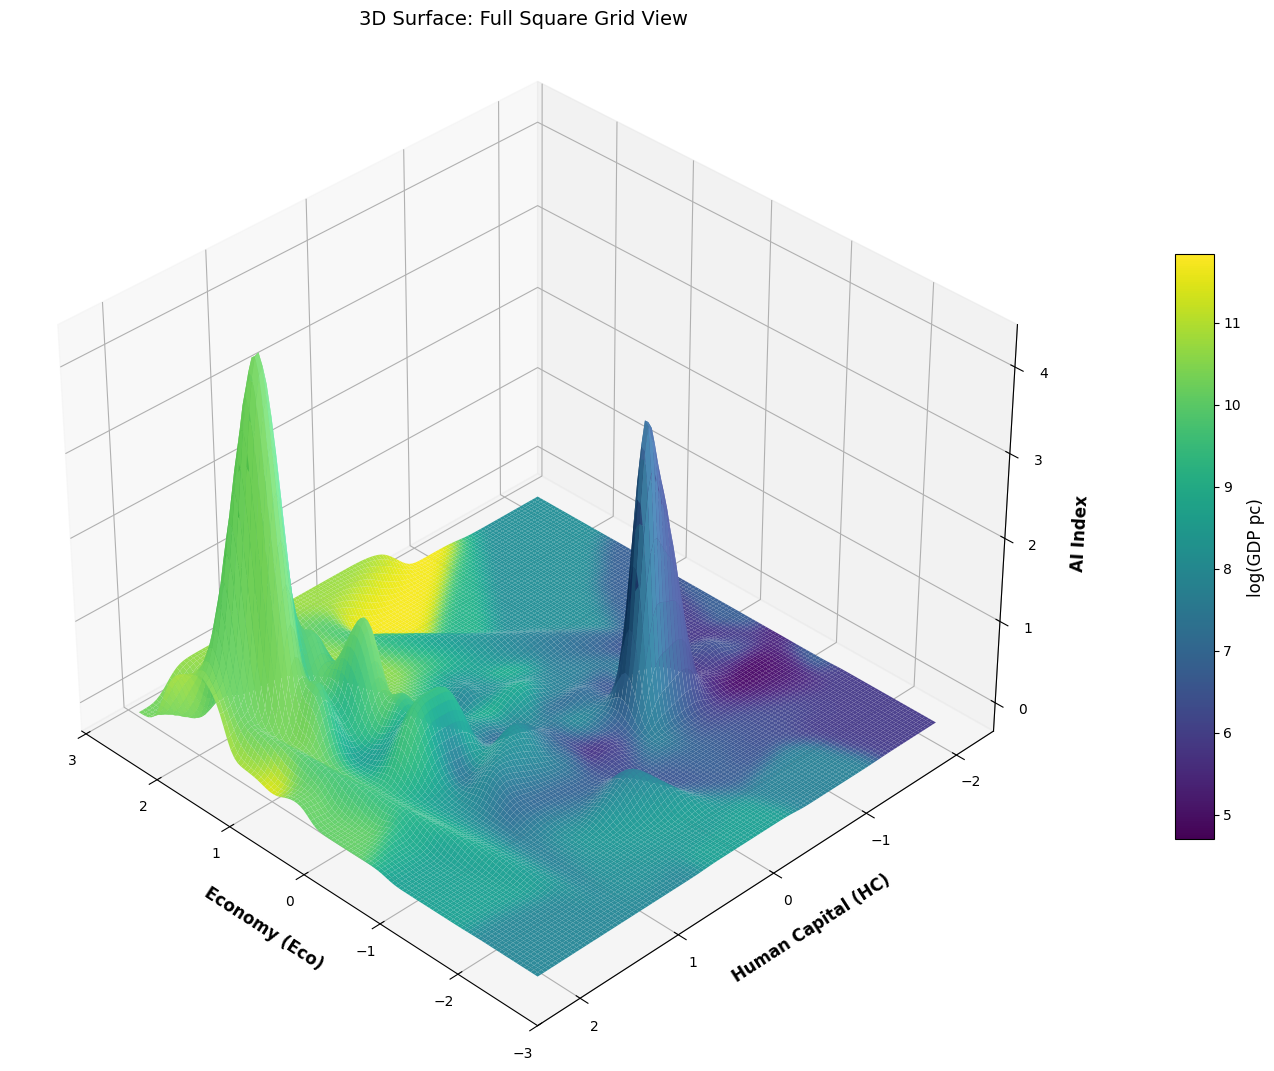

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.colors import LightSource
from scipy.ndimage import gaussian_filter

# 1. DATA PREP
# Giả sử chart_3d đã có sẵn
chart_clean = chart_3d.dropna()

x = chart_clean['z_Eco'].values
y = chart_clean['z_HC'].values
z = chart_clean['z_AI'].values
c = chart_clean['ln_gdp_pc'].values

# 2. TẠO KHUNG LƯỚI HÌNH VUÔNG (GRID)
# Quyết định biên của hình vuông dựa trên Min/Max của dữ liệu
resolution = 120
xi = np.linspace(x.min(), x.max(), resolution)
yii = np.linspace(y.min(), y.max(), resolution)
Xi, Yi = np.meshgrid(xi, yii)

# 3. KỸ THUẬT LẤP ĐẦY HÌNH VUÔNG (HYBRID INTERPOLATION)
# Bước 3a: Nội suy chính xác bên trong vùng dữ liệu (Linear)
Zi_linear = griddata((x, y), z, (Xi, Yi), method='linear')
Ci_linear = griddata((x, y), c, (Xi, Yi), method='linear')

# Bước 3b: Nội suy lấp đầy các góc trống (Nearest Neighbor)
# Nearest sẽ kéo dài giá trị ở biên ra tận góc để lấp đầy hình vuông
Zi_nearest = griddata((x, y), z, (Xi, Yi), method='nearest')
Ci_nearest = griddata((x, y), c, (Xi, Yi), method='nearest')

# Bước 3c: Hợp nhất (Chỗ nào Linear bị rỗng NaN thì điền bằng Nearest)
mask_z = np.isnan(Zi_linear)
Zi_linear[mask_z] = Zi_nearest[mask_z] # Lấp đầy độ cao

mask_c = np.isnan(Ci_linear)
Ci_linear[mask_c] = Ci_nearest[mask_c] # Lấp đầy màu sắc

# 4. LÀM MƯỢT (SMOOTHING)
# Sau khi lấp đầy, bề mặt có thể hơi thô, ta mài mượt nó
Zi = gaussian_filter(Zi_linear, sigma=2.0) # Sigma=2 để mượt hơn nữa
Ci = gaussian_filter(Ci_linear, sigma=2.0) # Làm mượt cả sự chuyển màu

# 5. ÁNH SÁNG & MÀU SẮC (VISUALIZATION)
ls = LightSource(azdeg=315, altdeg=45)
norm = colors.Normalize(vmin=np.nanmin(c), vmax=np.nanmax(c))
cmap = plt.get_cmap('viridis')
rgb = cmap(norm(Ci))

# Tạo bóng đổ
shaded_colors = ls.shade_rgb(rgb, elevation=Zi, vert_exag=0.5, blend_mode='soft')

# 6. VẼ HÌNH
fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(
    Xi, Yi, Zi,
    facecolors=shaded_colors,
    rstride=1, cstride=1,
    linewidth=0,
    shade=False,
    antialiased=True
)

# --- Labels & Settings ---
ax.set_xlabel('Economy (Eco)', fontsize=12, fontweight='bold', labelpad=10)
ax.set_ylabel('Human Capital (HC)', fontsize=12, fontweight='bold', labelpad=10)
ax.set_zlabel('AI Index', fontsize=12, fontweight='bold', labelpad=10)

# Chỉnh giới hạn trục Z nếu cần (để hình không bị bẹt hoặc quá cao)
# ax.set_zlim(z.min(), z.max())

ax.set_title('3D Surface: Full Square Grid View', fontsize=14)

# Colorbar
m = cm.ScalarMappable(norm=norm, cmap=cmap)
m.set_array([])
cbar = plt.colorbar(m, ax=ax, shrink=0.5, aspect=15, pad=0.1)
cbar.set_label('log(GDP pc)', fontsize=12)

# Góc nhìn đẹp
ax.view_init(elev=35, azim=135)

plt.tight_layout()
plt.show()

Mean ln_gdp_pc by K-means Group (overall):
kmeans_group
1.0     8.740844
2.0    10.321698
3.0     6.908402
Name: ln_gdp_pc, dtype: float64


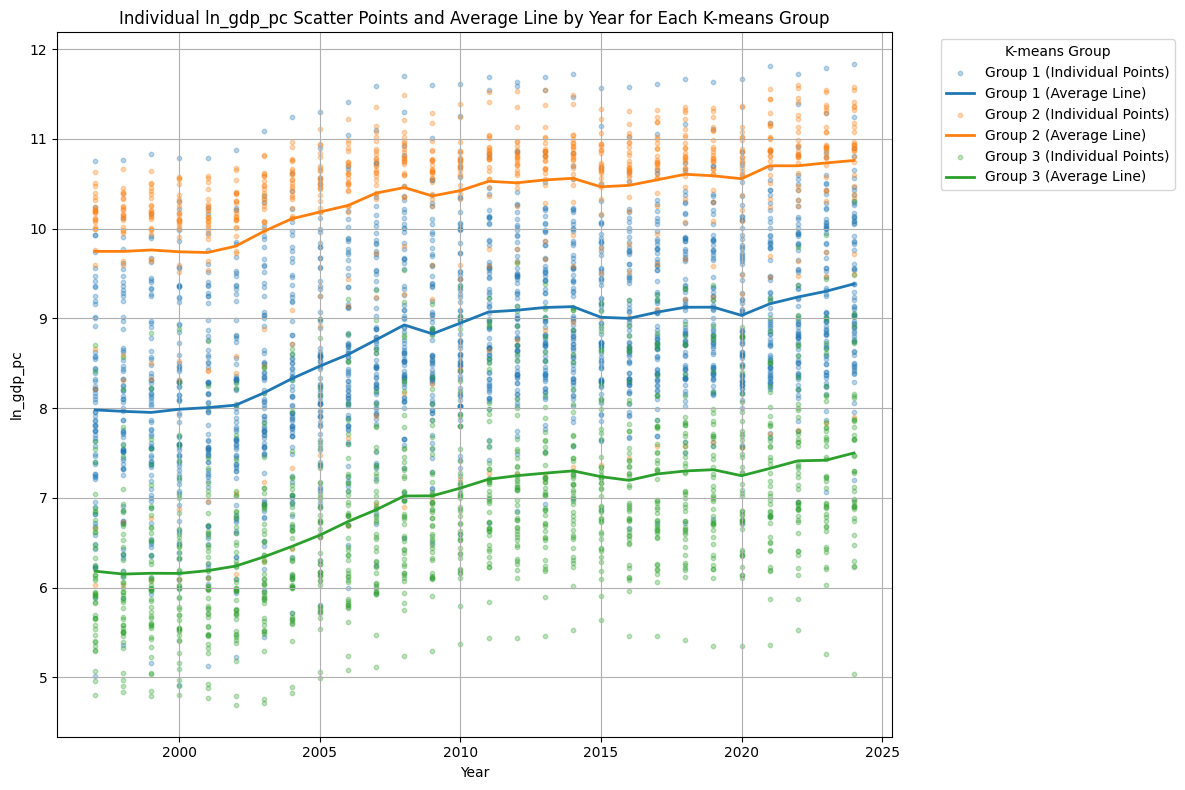

In [37]:
import matplotlib.pyplot as plt

k_mean = stata_data.copy()

# Drop rows where 'kmeans_group' is NaN to ensure proper plotting by group
plot_data = k_mean.dropna(subset=['kmeans_group']).copy()

# Calculate mean ln_gdp_pc for each group (overall mean across all years)
mean_ln_gdp_pc_by_group = plot_data.groupby('kmeans_group')['ln_gdp_pc'].mean()
print("Mean ln_gdp_pc by K-means Group (overall):")
print(mean_ln_gdp_pc_by_group)

# Calculate the mean ln_gdp_pc per year for each kmeans_group
mean_ln_gdp_pc_yearly_by_group = plot_data.groupby(['year', 'kmeans_group'])['ln_gdp_pc'].mean().reset_index()

plt.figure(figsize=(12, 8))

# Get unique kmeans_groups
unique_groups = mean_ln_gdp_pc_yearly_by_group['kmeans_group'].unique()

# Plot individual scatter points for each group and overlay the average line
for group in sorted(unique_groups):
    group_data_yearly_mean = mean_ln_gdp_pc_yearly_by_group[mean_ln_gdp_pc_yearly_by_group['kmeans_group'] == group]
    individual_group_data = plot_data[plot_data['kmeans_group'] == group]

    # Plot individual scatter points for the group
    plt.scatter(individual_group_data['year'], individual_group_data['ln_gdp_pc'],
                label=f'Group {int(group)} (Individual Points)', alpha=0.3, s=10)

    # Plot the average line for the group
    plt.plot(group_data_yearly_mean['year'], group_data_yearly_mean['ln_gdp_pc'],
             label=f'Group {int(group)} (Average Line)', linewidth=2)

plt.xlabel('Year')
plt.ylabel('ln_gdp_pc')
plt.title('Individual ln_gdp_pc Scatter Points and Average Line by Year for Each K-means Group')
plt.legend(title='K-means Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
relevant_cols_for_mean = ['country_code', 'HC_Index', 'economicfreedom', 'ai_docs']
cleaned_data = stata_data[relevant_cols_for_mean].dropna()
mean_data_for_maps = cleaned_data.groupby('country_code').mean().reset_index()
display(mean_data_for_maps.head())

,country_code,HC_Index,economicfreedom,ai_docs
0,AGO,0.261517,50.450001,0.000010
1,ALB,0.455330,65.257143,0.000309
2,ARE,0.498534,76.899999,0.014925
3,ARG,0.539692,54.365384,0.001903
4,ARM,0.430441,68.115790,0.000096


In [30]:
import plotly.express as px

fig = px.choropleth(mean_data_for_maps.dropna(subset=['ai_docs']), # Drop rows where ai_docs is NaN for plotting
                    locations='country_code',
                    color='ai_docs',
                    hover_name='country_code',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Mean AI Docs by Country')
fig.show()

In [31]:
import plotly.express as px

fig = px.choropleth(mean_data_for_maps.dropna(subset=['economicfreedom']), # Drop rows where economicfreedom is NaN for plotting
                    locations='country_code',
                    color='economicfreedom',
                    hover_name='country_code',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Mean Economic Freedom by Country')
fig.show()

In [32]:
import plotly.express as px

fig = px.choropleth(mean_data_for_maps.dropna(subset=['HC_Index']), # Drop rows where HC_Index is NaN for plotting
                    locations='country_code',
                    color='HC_Index',
                    hover_name='country_code',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Mean Human Capital Index (HC_Index) by Country')
fig.show()